Bank Marketing Analysis

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

import xgboost

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

import random as rand

01. Import data

In [2]:
df = pd.read_csv('/Users/Ekpreet/OneDrive - Lovely Professional University/Lpu material/SEM 5/INT254/04_Project Files/bank.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


2. Data exploration

In [3]:
print("Bank marketing dataset consists of {rows} rows.".format(rows = len(df)))
missing_values = df.isnull().mean() * 100
missing_values.sum()

Bank marketing dataset consists of 11162 rows.


0.0

2.1 Categorical columns exploration

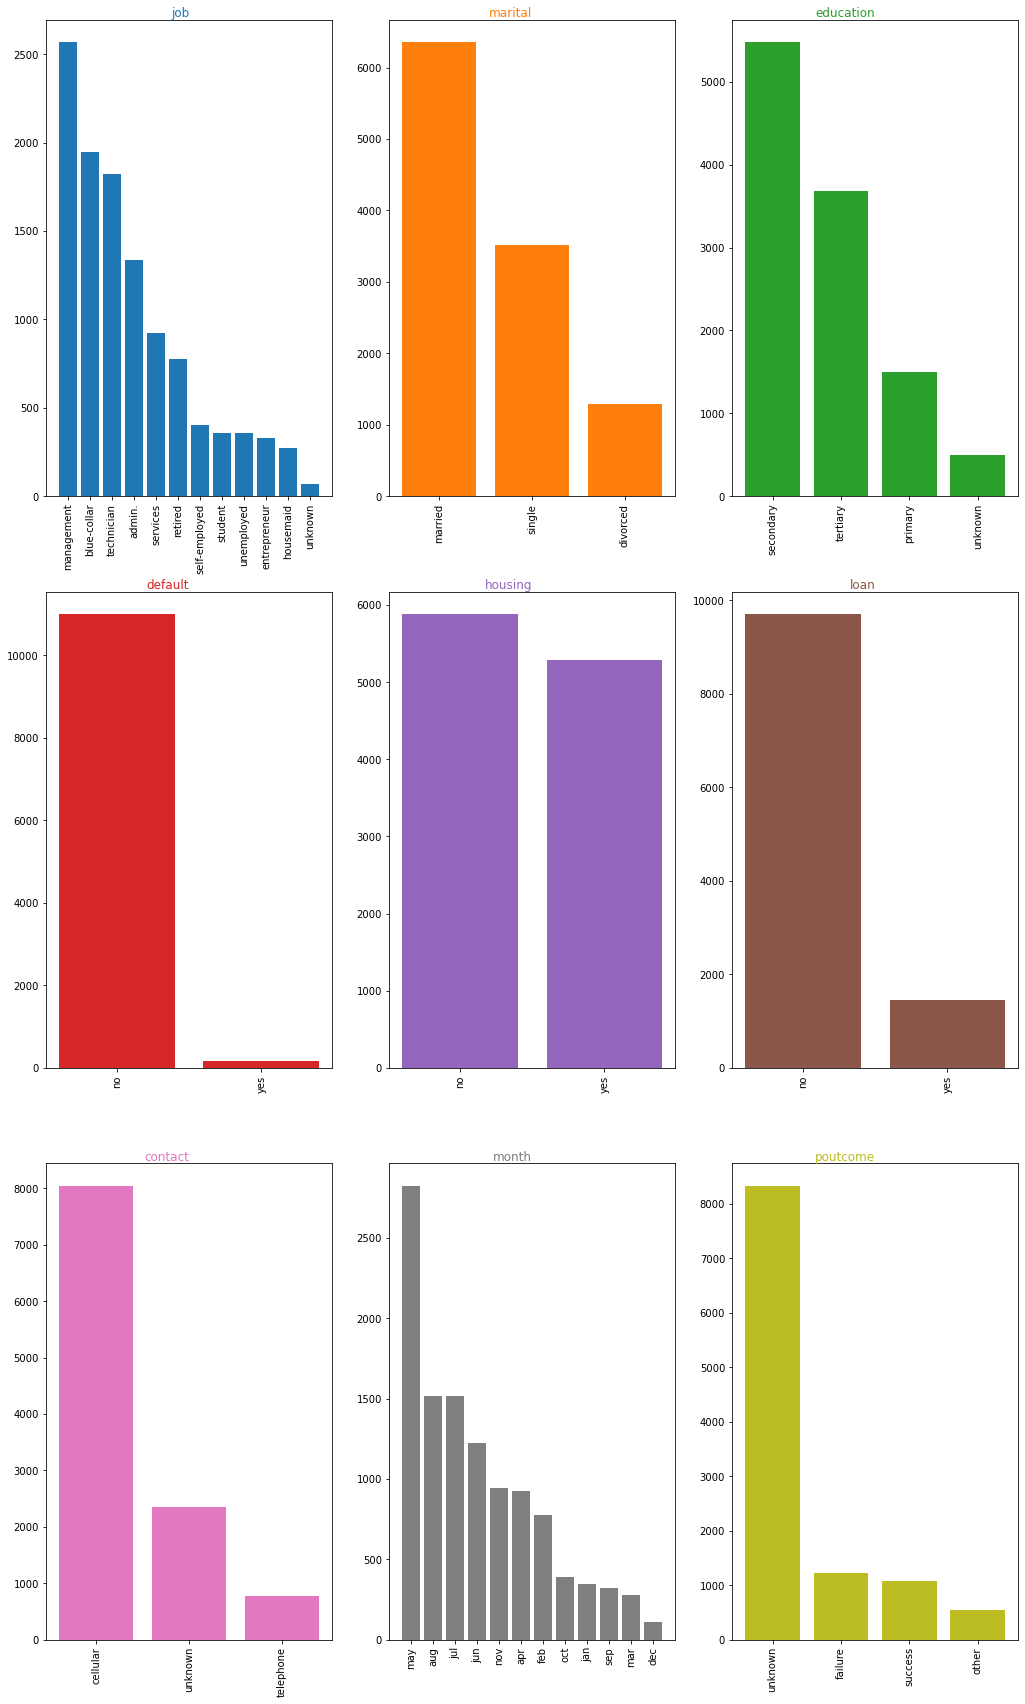

In [4]:
cat_columns =  ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
fig, axs = plt.subplots(3, 3, sharex = False, sharey = False, figsize = (20, 15))
counter = 0
ran_color = ('tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan')
for cat_column in cat_columns :
    value_counts = df[cat_column].value_counts()
    trace_x = counter // 3
    trace_y = counter % 3
    x_pos =np.arange(0, len(value_counts))
    axs[trace_x, trace_y].bar(x_pos, value_counts.values, tick_label = value_counts.index, color = ran_color[counter])
    axs[trace_x, trace_y].set_title(cat_column, color = ran_color[counter], horizontalalignment = 'right', pad = -25.0)
    plt.subplots_adjust(bottom=0.0001, right=0.8, top=1.5)
    for tick in axs[trace_x, trace_y].get_xticklabels() :
        tick.set_rotation(90)
    counter += 1
plt.show()

2.2 Numerical columns exploration

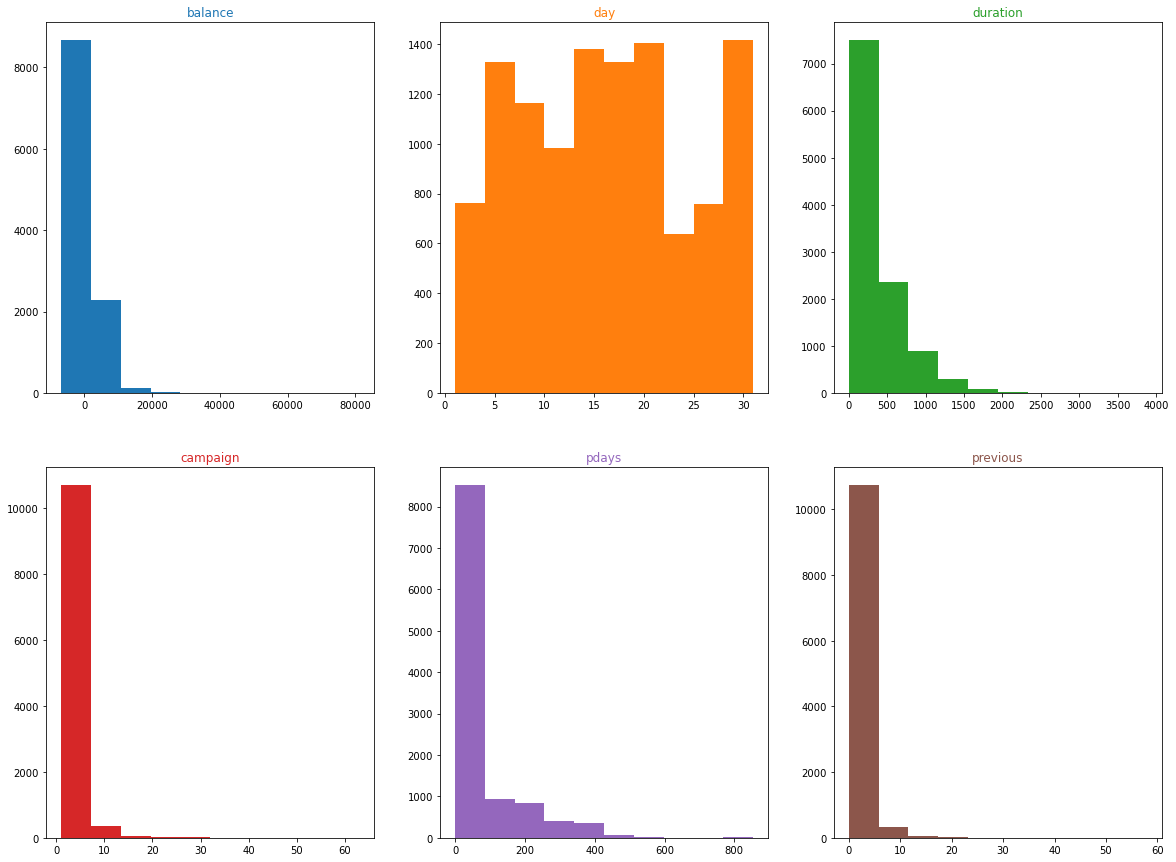

In [5]:
num_columns = ['balance' , 'day', 'duration', 'campaign', 'pdays', 'previous']
fig, axs = plt.subplots(2, 3, sharex = False, sharey = False, figsize = (20, 15))
counter = 0
for num_column in num_columns :
    trace_x = counter // 3
    trace_y = counter % 3
    axs[trace_x, trace_y].hist(df[num_column], color = ran_color[counter])
    axs[trace_x, trace_y].set_title(num_column, color = ran_color[counter])
    counter += 1
plt.show()

In [6]:
df[['pdays', 'previous', 'campaign']].describe()

,pdays,previous,campaign
count,11162.000000,11162.000000,11162.000000
mean,51.330407,0.832557,2.508421
std,108.758282,2.292007,2.722077
min,-1.000000,0.000000,1.000000
25%,-1.000000,0.000000,1.000000
50%,-1.000000,0.000000,2.000000
75%,20.750000,1.000000,3.000000
max,854.000000,58.000000,63.000000


In [7]:
len (df[df['pdays'] > 400] ) /  len(df) * 100

1.2005017022039062

In [8]:
len (df[df['campaign'] > 34]) / len(df) * 100

0.035835871707579285

In [9]:
len (df[df['previous'] > 34]) / len(df) * 100

0.04479483963447411

<AxesSubplot:title={'center':'Deposit value counts'}>

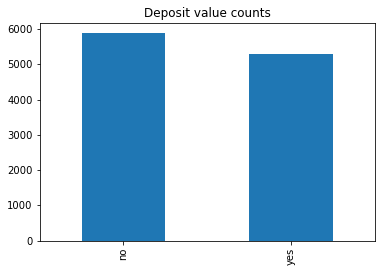

In [10]:
value_counts = df['deposit'].value_counts()
value_counts.plot.bar(title = 'Deposit value counts')

<AxesSubplot:title={'center':'job and deposit'}>

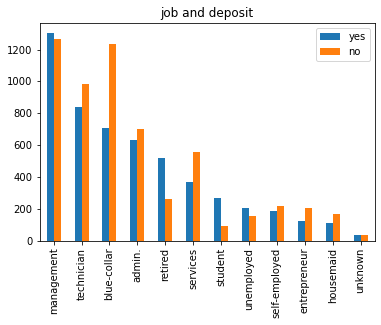

In [11]:
j_df = pd.DataFrame()
j_df['yes'] = df[df['deposit'] == 'yes']['job'].value_counts()
j_df['no'] = df[df['deposit'] == 'no']['job'].value_counts()
j_df.plot.bar(title = 'job and deposit')

<AxesSubplot:title={'center':'Marital status and deposit'}>

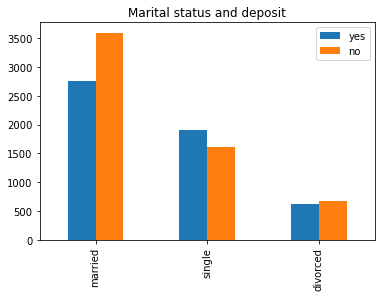

In [12]:
j_df = pd.DataFrame()
j_df['yes'] = df[df['deposit'] == 'yes']['marital'].value_counts()
j_df['no'] = df[df['deposit'] == 'no']['marital'].value_counts()
j_df.plot.bar(title = 'Marital status and deposit')

<AxesSubplot:title={'center':'Education and deposit'}>

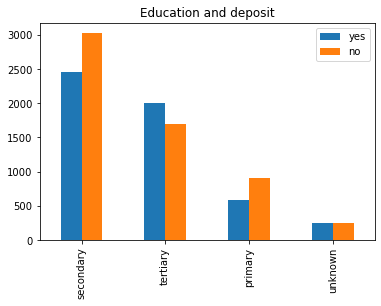

In [13]:
j_df = pd.DataFrame()
j_df['yes'] = df[df['deposit'] == 'yes']['education'].value_counts()
j_df['no'] = df[df['deposit'] == 'no']['education'].value_counts()
j_df.plot.bar(title = 'Education and deposit')

<AxesSubplot:title={'center':'Type of contact and deposit'}>

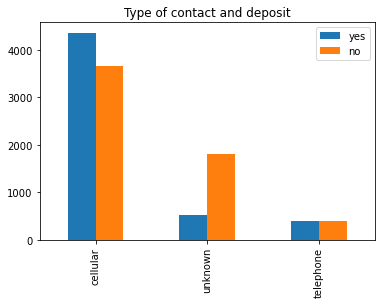

In [14]:
j_df = pd.DataFrame()
j_df['yes'] = df[df['deposit'] == 'yes']['contact'].value_counts()
j_df['no'] = df[df['deposit'] == 'no']['contact'].value_counts()
j_df.plot.bar(title = 'Type of contact and deposit')

In [15]:
b_df = pd.DataFrame()
b_df['balance_yes'] = (df[df['deposit'] == 'yes'][['deposit', 'balance']].describe())['balance']
b_df['balance_no'] = (df[df['deposit'] == 'no'][['deposit', 'balance']].describe())['balance']
b_df

,balance_yes,balance_no
count,5289.000000,5873.000000
mean,1804.267915,1280.227141
std,3501.104777,2933.411934
min,-3058.000000,-6847.000000
25%,210.000000,64.000000
50%,733.000000,414.000000
75%,2159.000000,1324.000000
max,81204.000000,66653.000000


<AxesSubplot:title={'center':'Balance and deposit statistics'}>

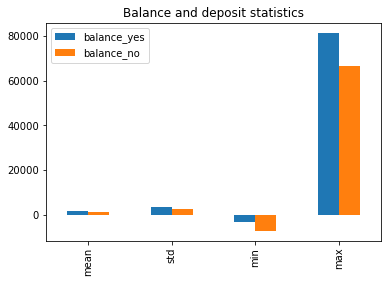

In [16]:
b_df.drop(['count', '25%', '50%', '75%']).plot.bar(title = 'Balance and deposit statistics')


In [17]:
a_df = pd.DataFrame()
a_df['age_yes'] = (df[df['deposit'] == 'yes'][['deposit', 'age']].describe())['age']
a_df['age_no'] = (df[df['deposit'] == 'no'][['deposit', 'age']].describe())['age']
a_df

,age_yes,age_no
count,5289.000000,5873.000000
mean,41.670070,40.837391
std,13.497781,10.264815
min,18.000000,18.000000
25%,31.000000,33.000000
50%,38.000000,39.000000
75%,50.000000,48.000000
max,95.000000,89.000000


<AxesSubplot:title={'center':'Age and deposit statistics'}>

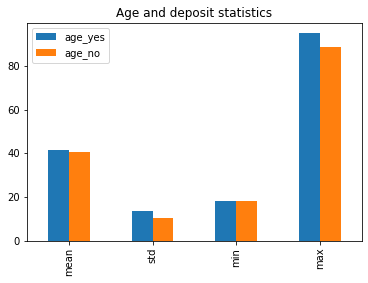

In [18]:
a_df.drop(['count', '25%', '50%', '75%']).plot.bar(title = 'Age and deposit statistics')

In [19]:
c_df = pd.DataFrame()
c_df['campaign_yes'] = (df[df['deposit'] == 'yes'][['deposit', 'campaign']].describe())['campaign']
c_df['campaign_no'] = (df[df['deposit'] == 'no'][['deposit', 'campaign']].describe())['campaign']
c_df

,campaign_yes,campaign_no
count,5289.000000,5873.000000
mean,2.141047,2.839264
std,1.921826,3.244474
min,1.000000,1.000000
25%,1.000000,1.000000
50%,2.000000,2.000000
75%,3.000000,3.000000
max,32.000000,63.000000


<AxesSubplot:title={'center':'Number of contacts performed during this campaign and deposit statistics'}>

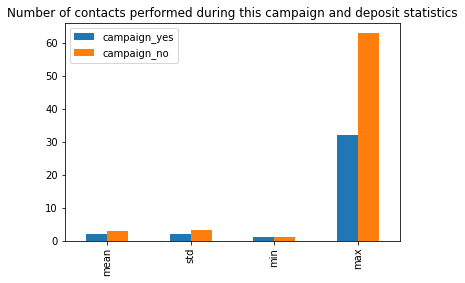

In [20]:
c_df.drop(['count', '25%', '50%', '75%']).plot.bar(title = 'Number of contacts performed during this campaign and deposit statistics')


In [21]:
p_df = pd.DataFrame()
p_df['previous_yes'] = (df[df['deposit'] == 'yes'][['deposit', 'previous']].describe())['previous']
p_df['previous_no'] = (df[df['deposit'] == 'no'][['deposit', 'previous']].describe())['previous']
p_df

,previous_yes,previous_no
count,5289.000000,5873.00000
mean,1.170354,0.52835
std,2.553272,1.97961
min,0.000000,0.00000
25%,0.000000,0.00000
50%,0.000000,0.00000
75%,1.000000,0.00000
max,58.000000,41.00000


<AxesSubplot:title={'center':'Number of contacts performed during previous campaign and deposit statistics'}>

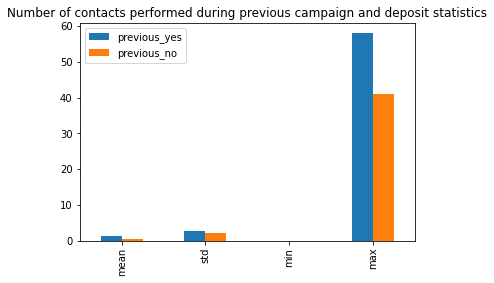

In [22]:
p_df.drop(['count', '25%', '50%', '75%']).plot.bar(title = 'Number of contacts performed during previous campaign and deposit statistics')

3. Data Cleaning

In [23]:
def get_dummy_from_bool(row, column_name) :
    return 1 if row[column_name] == 'yes' else 0

def get_correct_values(row, column_name, threshold, df) :
    if row[column_name] <= threshold :
        return row[column_name]
    else :
        mean = df[df[column_name] <= threshold][column_name].mean()
        return mean

def clean_data(df) :
    cleaned_df = df.copy()
    bool_columns = ['default', 'housing', 'loan', 'deposit']
    for bool_col in bool_columns :
        cleaned_df[bool_col + '_bool'] = df.apply(lambda row : get_dummy_from_bool(row, bool_col), axis = 1)
    cleaned_df = cleaned_df.drop(columns = bool_columns)

    cat_columns = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']
    for col in cat_columns :
        cleaned_df = pd.concat([cleaned_df.drop(col, axis = 1), pd.get_dummies(cleaned_df[col], prefix = col, prefix_sep = '_', drop_first = False, dummy_na = False)], axis = 1)
    cleaned_df = cleaned_df.drop(columns = ['pdays'])

    cleaned_df['campaign_cleaned'] = df.apply(lambda row : get_correct_values(row, 'campaign', 34, cleaned_df), axis = 1)
    cleaned_df['previous_cleaned'] = df.apply(lambda row : get_correct_values(row, 'previous', 34, cleaned_df), axis = 1)
    cleaned_df = cleaned_df.drop(columns = ['campaign', 'previous'])

    return cleaned_df


In [24]:
cleaned_df = clean_data(df)
cleaned_df.head()


,age,balance,day,duration,default_bool,housing_bool,loan_bool,deposit_bool,job_admin.,job_blue-collar,...,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,campaign_cleaned,previous_cleaned
0,59,2343,5,1042,0,1,0,1,1,0,...,1,0,0,0,0,0,0,1,1.0,0.0
1,56,45,5,1467,0,0,0,1,1,0,...,1,0,0,0,0,0,0,1,1.0,0.0
2,41,1270,5,1389,0,1,0,1,0,0,...,1,0,0,0,0,0,0,1,1.0,0.0
3,55,2476,5,579,0,1,0,1,0,0,...,1,0,0,0,0,0,0,1,1.0,0.0
4,54,184,5,673,0,0,0,1,1,0,...,1,0,0,0,0,0,0,1,2.0,0.0


4. Machine learning for prediction of campaign outcome

In [25]:
X = cleaned_df.drop(columns = 'deposit_bool')
y = cleaned_df[['deposit_bool']]

In [26]:
TEST_SIZE = 0.3
RAND_STATE = 30


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = TEST_SIZE, random_state = RAND_STATE)

In [28]:
xgb = xgboost.XGBClassifier(n_estimators = 100, learning_rate = 0.08, gamma = 0, subsample = 0.75, colsample_bytree = 1, max_depth = 7)
xgb.fit(X_train, y_train.squeeze().values)

y_train_preds = xgb.predict(X_train)
y_test_preds = xgb.predict(X_test)

print('XGB accuracy score for train : %.3f : test : %.3f' % (accuracy_score(y_train, y_train_preds), accuracy_score(y_test, y_test_preds)))

XGB accuracy score for train : 0.914 : test : 0.849


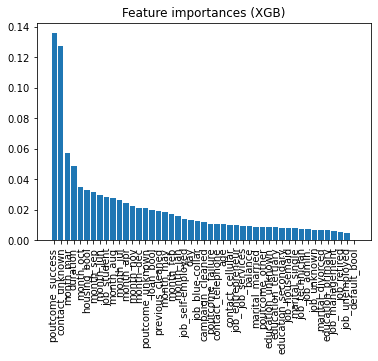

In [29]:
headers = ["name", "score"] 
values = sorted(zip(X_train.columns, xgb.feature_importances_), key = lambda x : x[1] * -1)
xgb_feature_importances = pd.DataFrame(values, columns = headers)

x_pos = np.arange(0, len(xgb_feature_importances))
plt.bar(x_pos, xgb_feature_importances['score'])
plt.xticks(x_pos, xgb_feature_importances['name'])
plt.xticks(rotation = 90)
plt.title('Feature importances (XGB)')
plt.show()

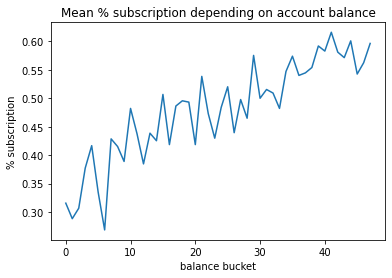

In [30]:
df_new = cleaned_df.copy()
df_new['balance_buckets'] = pd.qcut(df_new['balance'], 50, labels = False, duplicates = 'drop')
mean_deposit = df_new.groupby(['balance_buckets'])['deposit_bool'].mean()
plt.plot(mean_deposit.index, mean_deposit.values)
plt.title('Mean % subscription depending on account balance')
plt.xlabel('balance bucket')
plt.ylabel('% subscription')
plt.show()


In [31]:
df_new[df_new['balance_buckets'] == 34]['balance'].min()

1490

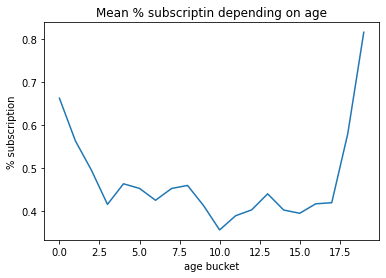

In [32]:
df_new['age_buckets'] = pd.qcut(df_new['age'], 20, labels = False, duplicates = 'drop')
mean_age = df_new.groupby(['age_buckets'])['deposit_bool'].mean()
plt.plot(mean_age.index, mean_age.values)
plt.title('Mean % subscriptin depending on age')
plt.xlabel('age bucket')
plt.ylabel('% subscription')
plt.show()

In [33]:
df_new[df_new['age_buckets'] == 3]['age'].max()

31

In [34]:
df_new[df_new['age_buckets'] == 17]['age'].min()

56

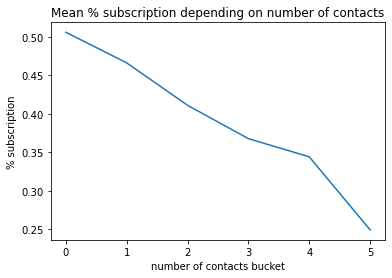

In [35]:
df_new['campaign_buckets'] = pd.qcut(df_new['campaign_cleaned'], 20, labels = False, duplicates = 'drop')
mean_campaign = df_new.groupby(['campaign_buckets'])['deposit_bool'].mean()
plt.plot(mean_campaign.index, mean_campaign.values)
plt.title('Mean % subscription depending on number of contacts')
plt.xlabel('number of contacts bucket')
plt.ylabel('% subscription')
plt.show()

In [36]:
df_new[df_new['campaign_buckets'] == 2]['campaign_cleaned'].min()

4.0